# Computational Science

## Imports 

In [1]:
import pandas as pd #Import Pandas for Dataframes
import seaborn as sns #Import Seaborn for Graphs

## Eulers Method

![Eulers](https://i.imgur.com/MPAQeOI.jpg)

In [6]:
def EulersEquation(U,x): # Eulers Equation  F = -2X+2U used to calulate the value of x in the full algorithm 
    f = -2*x +2*U #Performs the equation 
    return f # Returns the value

def IntergationCount (h,i): # Integration Count is used to calulate the difference between the Step size and the sample integral
    OGStep = h # Sets the Original Step size to the value of the step size (this changes later so needs to be constant)
    Count  = 0 # Set count varible to 0, This will be the difference
    S = False # set Start to False 
    if (i == 0):  # if the Sample Integral is not set set S to True
        S = True

    while S == False: # If the sample integral is set calculate the difference
        Count = Count + 1
        if (Count*OGStep == i): #verify if integral size is the correct amount then shut the gate
            S = True
            
    return Count #return the sample size

def Eulers(a,b,h,T,i): #Take in XInit,YInit, Step Size, Time and Sample Intergal
    df1 = pd.DataFrame({"T":[],"X":[],"U":[]}) #declare dataframe structure 
    t =a #Set Time at position 0, Can be higher based on inital Entry
    x= b  # Set x at position 0, Can be higher based on inital Entry
    Count = 0 #set count to 0 used in determing how many to print based on the sample size
    
    IntegrationCount = IntergationCount(h,i) #Calculate the sample size 
    
    while t<=T: #while Current time < initial time
        if (t<0 or t<=5): #Set rotbot direction (U) based on where the time is
            U = 2
        elif (t<5 or t<=10):
            U = 1
        elif (t<10 or t<=15):
            U =3
    
        k = h*EulersEquation(U,x) #perform equation stated in the method Eulers Eqation
        x = x +k # add predition to the x value (Plotted later)
        t = t+h #increase step for next result
        Count = Count + 1 # increase count for integral
        
        if (Count >= IntegrationCount): # if the count is at the integral amount add to dataframe
            df2 = pd.DataFrame({"T":[t],"X":[x],"U":[U]}) #get result of eulers in dataframe based on integral steps
            df1 = df1.append(df2) #append to dataframe
            Count = 0 #reset the count to 0
            
    df1.reset_index(inplace=True) # reset the index broken by appending 2 dataframes
    df1 = df1.drop(columns=['index']) #drop the inital index column (Blank)
    return df1 # return dataframe 

## Perform Eulers 

(Returns as Pandas Dataframe)

In [12]:
print ("Enter xInitial") # Ask the user to input Initial X Value
xInit = float (input())
print ("Enter yInitial") # Ask the user to input Initial Y Value
yInit = float (input())
print ("Enter Step Size") # Ask the user to input Step Size
Step = float (input())
print ("Enter Time") # Ask the user to input Time Value
Time = float (input()) 
print ("Enter Sample Integral (To Print all put 0 )") # Ask the user to input Sample Value
Integration = float (input())


df1 = Eulers(xInit,yInit,Step,Time,Integration) # Perform the Eulers method on those parameters and return a pandas dataframe
df1

Enter xInitial
0
Enter yInitial
0
Enter Step Size
0.01
Enter Time
10
Enter Sample Integral (To Print all put 0 )
0.1


,T,X,U
0,0.1,0.365854,2.0
1,0.2,0.664784,2.0
2,0.3,0.909031,2.0
3,0.4,1.108599,2.0
4,0.5,1.271661,2.0
...,...,...,...
95,9.6,1.000094,1.0
96,9.7,1.000077,1.0
97,9.8,1.000063,1.0
98,9.9,1.000051,1.0


### Export to CSV (if required)

In [8]:
print ("Please Enter Filepath to save to CSV") # Asks for filepath where user wants to save CSV File
filepath = input()
#export_csv = df1.to_csv (filepath + "\ComputationalRobot.csv") #Saves CSV based on input

Please Enter Filepath to save to CSV
C:\Users\James\Desktop


## Plot graphs

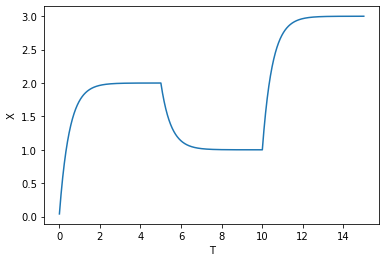

In [9]:
plt1 = sns.lineplot(x="T", y="X", data=df1) #Plots graph of the effects of X over time

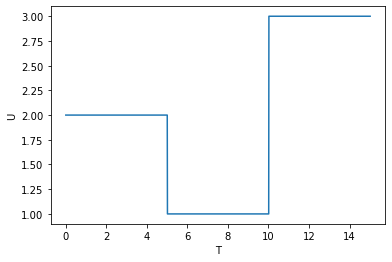

In [10]:
plt2 = sns.lineplot(x="T", y="U", data=df1) # Plots graph on the effect of U Over Time

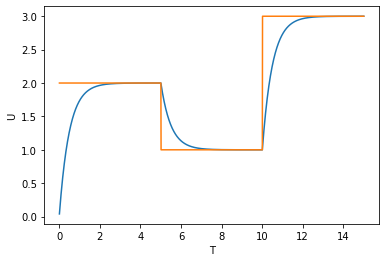

In [11]:
plt1 = sns.lineplot(x="T", y="X", data=df1) #Plots Comparision Graph 
plt2 = sns.lineplot(x="T", y="U", data=df1)
plt1
plt2